In [136]:
pip install keras==2.12.0

Import Libraries

In [137]:
# Import necessary libraries
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Import scikit-learn modules
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Import Keras modules
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score

**Mount Drive**

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
df = pd.read_csv('/content/drive/MyDrive/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn (1).csv') #read dataset

Viewing the details of DataFrame

In [140]:
# The value_counts() function is used to count unique values in the 'Churn' column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [141]:
#The customerID is not relevant in determining the churn hence drop it
df = df.drop('customerID', axis=1)

In [142]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [143]:
#The totalcharges column has float values but has an object type
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [144]:
# Remove rows where 'TotalCharges' is not a space
df = df[df.TotalCharges!=' ']


In [145]:
# Display the shape of the DataFrame after removing rows
print("Shape of DataFrame after removing rows with 'TotalCharges' not equal to space:", df.shape)

Shape of DataFrame after removing rows with 'TotalCharges' not equal to space: (7032, 20)


In [146]:
#Convert it to a numeric data type
df.TotalCharges = pd.to_numeric(df.TotalCharges)

<ipython-input-146-6b64ea3f119f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges = pd.to_numeric(df.TotalCharges)


In [147]:
# Display summary statistics of the DataFrame
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [148]:
# Check for missing values in the DataFrame
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [149]:
# Count the number of features in the DataFrame
num_features = df.shape[1]
print(f"The number of features in the DataFrame is: {num_features}")

The number of features in the DataFrame is: 20


In [150]:
# Identify and display object columns in the DataFrame
object_columns = df.select_dtypes(include=['object']).columns
print(f"The object  columns in the DataFrame are: \n{object_columns}")

The object  columns in the DataFrame are: 
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [151]:
# Identify and display numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
print(f"The numerical columns in the DataFrame are: \n{numerical_columns}")

The numerical columns in the DataFrame are: 
      SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0                 0       1           29.85         29.85
1                 0      34           56.95       1889.50
2                 0       2           53.85        108.15
3                 0      45           42.30       1840.75
4                 0       2           70.70        151.65
...             ...     ...             ...           ...
7038              0      24           84.80       1990.50
7039              0      72          103.20       7362.90
7040              0      11           29.60        346.45
7041              1       4           74.40        306.60
7042              0      66          105.65       6844.50

[7032 rows x 4 columns]


In [152]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [153]:
#Display the object colums and their values
def print_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [154]:
print_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Encoding  Columns**

In [155]:
#encoding all object columns
for column in object_columns:
    df[column] = pd.factorize(df[column])[0]


In [156]:
encoded_customer_df = df.copy()

In [157]:
encoded_customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1


In [158]:
encoded_customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.517491,0.499729,0.00,0.0000,1.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,1.325228,0.642585,0.00,1.0000,1.000,2.0000,2.00
InternetService,7032.0,0.872582,0.737271,0.00,0.0000,1.000,1.0000,2.00
OnlineSecurity,7032.0,0.718857,0.796556,0.00,0.0000,1.000,1.0000,2.00
OnlineBackup,7032.0,0.871303,0.737917,0.00,0.0000,1.000,1.0000,2.00


In [159]:
encoded_customer_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [160]:
encoded_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


In [161]:
#Initialise the StandardScaler
scaler = StandardScaler()

#Fit and transform the data
X_scaled = scaler.fit_transform(encoded_customer_df)


In [162]:
encoded_customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1




**Using feature importance to extract relevant features**

In [163]:
x= encoded_customer_df.drop('Churn', axis=1)  # Features
y = encoded_customer_df['Churn']  # The target variable

In [164]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [165]:
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

In [166]:
feature_importance_ = model.feature_importances_

In [167]:
# CreatDataFrame to store feature names and their importance scores
f_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance_})

# Sort the features by importance in descending order
f_importance_df = f_importance_df.sort_values(by='Importance', ascending=False)


In [168]:
# Print the top 5 relevant features
imp = 5
relevant_features = f_importance_df['Feature'][:imp]
print(relevant_features)


18      TotalCharges
17    MonthlyCharges
4             tenure
14          Contract
16     PaymentMethod
Name: Feature, dtype: object


**Exploratory Data Analysis**

In [169]:
# Number 2
#Using the features extracted by the feature importance, lets view how they relate to churning


**Distribution of Churn**

*    0 represents no churn and 1 represents churn.

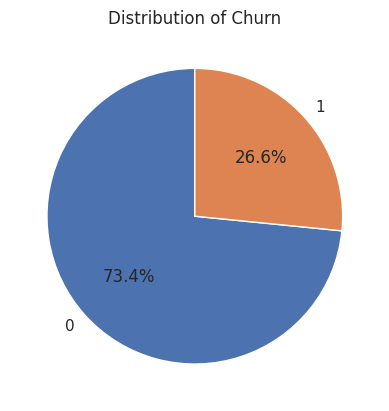

In [170]:
# Count the distribution of 'Churn' values in the DataFrame
churn_distribution = df['Churn'].value_counts()

# Extract labels and sizes for pie chart
labels = churn_distribution.index
sizes = churn_distribution.values

# Create a pie chart to visualize the distribution of 'Churn'
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Churn')

# Display the pie chart
plt.show()


There are less number of people in the company who have churned

**Relationship of Gender and Churn**

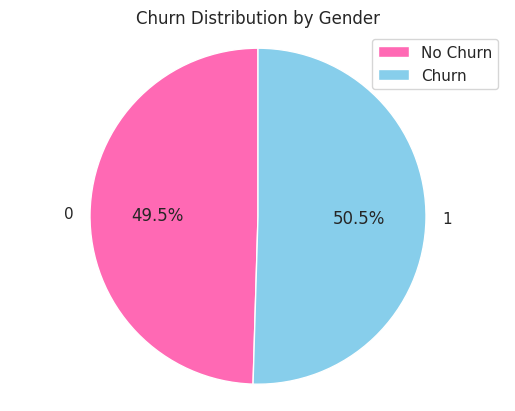

In [171]:
# Count the occurrences of each combination of 'Gender' and 'Churn'
churn_gender_counts = df.groupby(['gender', 'Churn']).size().unstack()

colors = ['hotpink', 'skyblue']
labels = ['No Churn', 'Churn']

# Creating a pie chart
plt.pie(churn_gender_counts.sum(axis=1), labels=churn_gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Churn Distribution by Gender')
plt.legend(labels, loc='upper right')
plt.axis('equal')
plt.show()



*  The pie chart is split evenly between the two genders, with 50.5% of churners being female and 49.5% being male. This means that there is no significant difference in churn rate between men and women.




**Relationship between Multiple Lines and Churn**



Text(0.5, 1.0, 'Relationship between Multiple Lines and Churn')

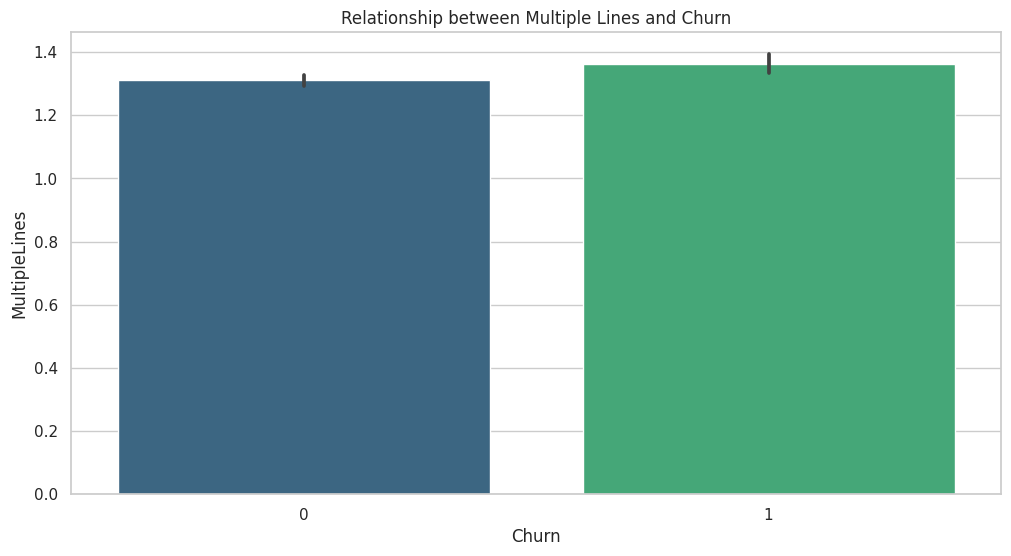

In [172]:
# Set style of seaborn
sns.set(style="whitegrid")

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x="Churn", y="MultipleLines", data=encoded_customer_df, palette="viridis")

# Add labels and title
plt.xlabel("Churn")
plt.ylabel("MultipleLines")
plt.title("Relationship between Multiple Lines and Churn")




*    This means that customers who have multiple lines are more likely to churn.



**Relationship Between Total Charges and Churn**

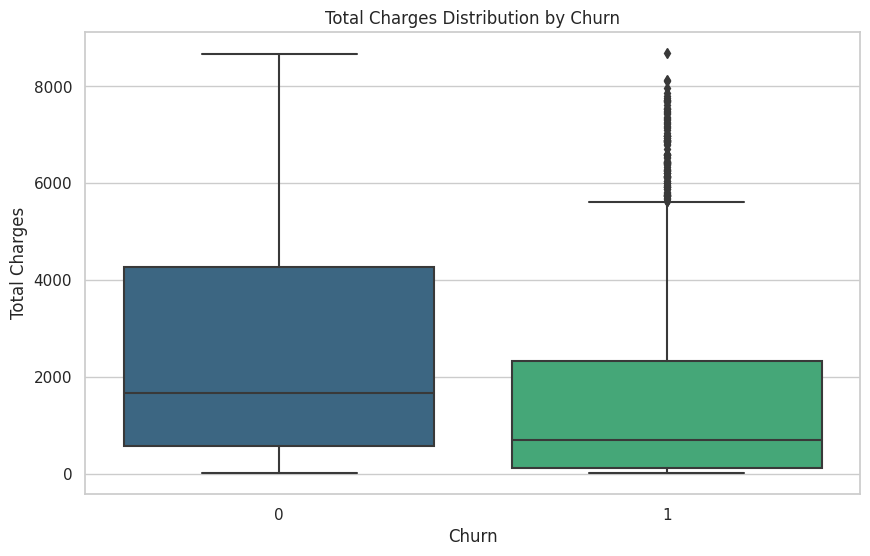

In [173]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=encoded_customer_df, palette='viridis')

# Add title and labels
plt.title("Total Charges Distribution by Churn")
plt.xlabel("Churn")
plt.ylabel("Total Charges")

plt.show()

Customers with low total charges may be more likely to churn

**Relationship between Monthly Charges and Churn**

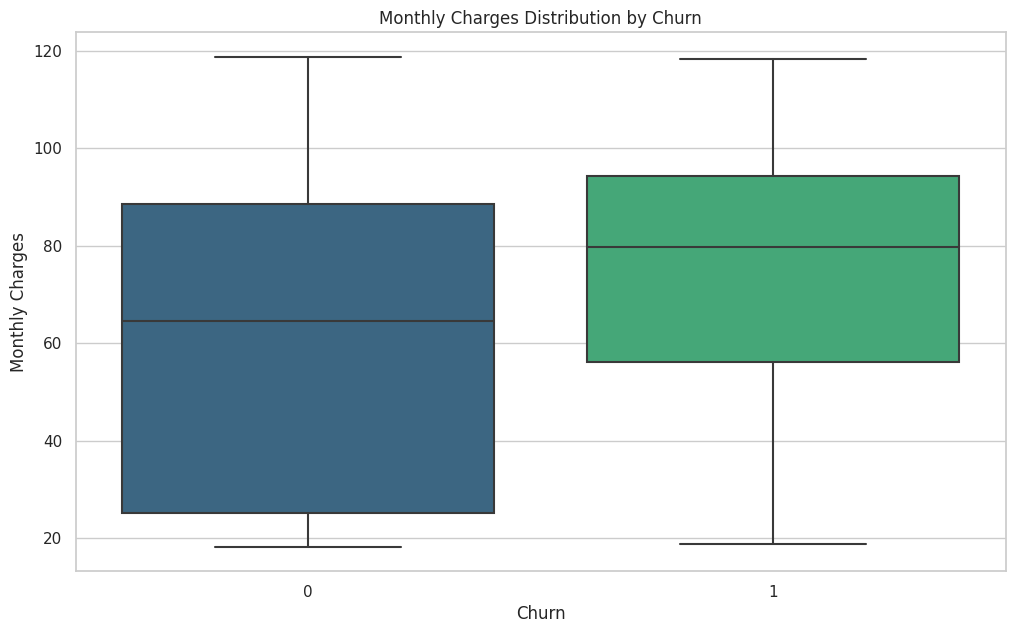

In [174]:
# Create a boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Churn', y='MonthlyCharges', data=encoded_customer_df, palette='viridis')

# Add title and labels
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")

plt.show()

Customers with higher monthly charges are more likey to churn

**Relationship between Contract and Churn**

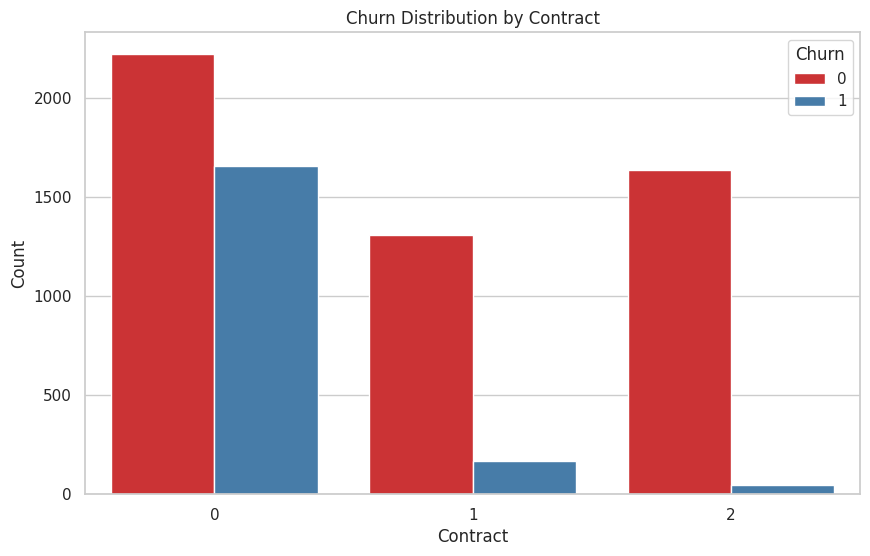

In [175]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')

# Add title and labels
plt.title("Churn Distribution by Contract")
plt.xlabel("Contract")
plt.ylabel("Count")

plt.show()

From this is clear that customers with short-term contracts are more-likely to churn

**Relationship between Payment Method and Churn**

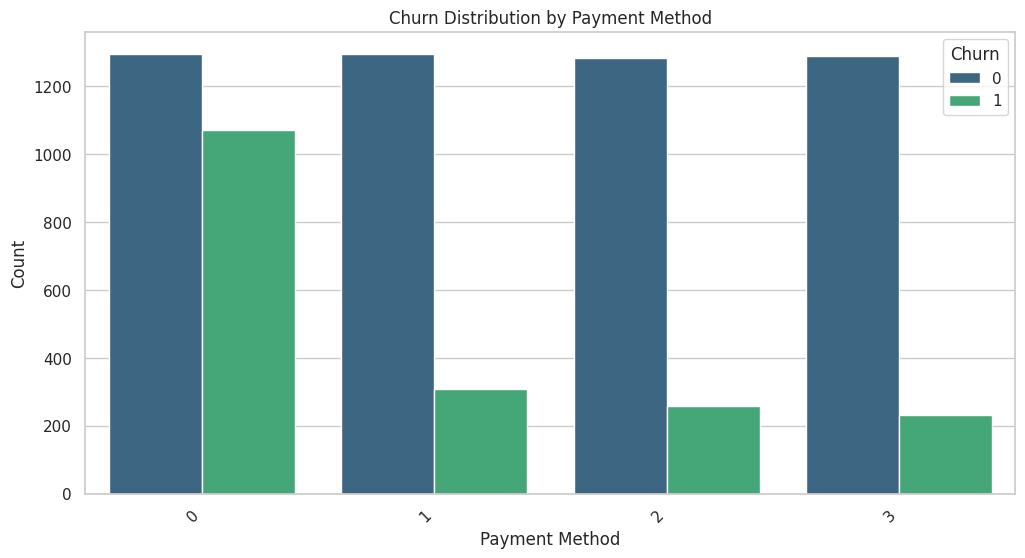

In [176]:
# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='viridis')

# Add title and labels
plt.title("Churn Distribution by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.show()

**Relationship between Tenure and Churn**

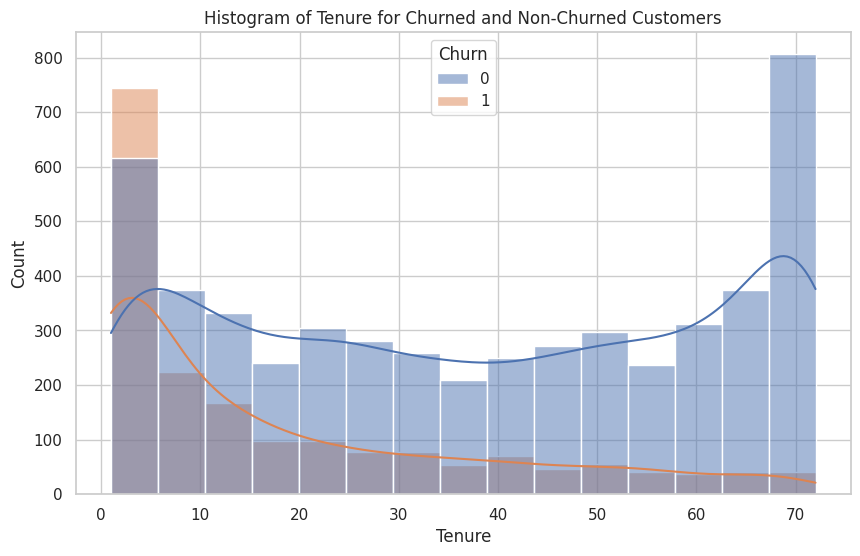

In [177]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True)
plt.title('Histogram of Tenure for Churned and Non-Churned Customers')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()


This image suggests that tenure is a strong predictor of churn. Customers with short tenure are much more likely to churn than customers with long tenure

**Relationship between Paperless Billing and Churn**

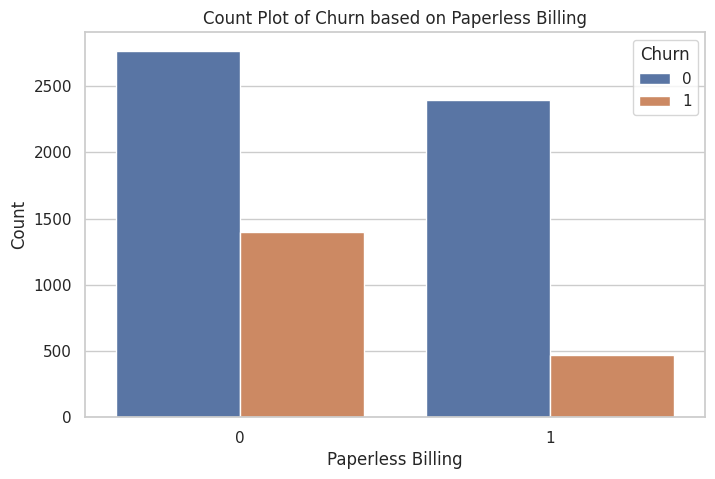

In [178]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title('Count Plot of Churn based on Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()

The chart shows that there are more customers who churned who were using paperless billing than customers who churned who were not using paperless billing

**Training the model using Multi-Layer Perceptron with Functional API**



In [179]:
X = encoded_customer_df[relevant_features]
y = encoded_customer_df['Churn']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [214]:
# Define the MLP model using the Functional API with best parameters
def create_model(activation='relu', optimizer='adam'):
    input_layer = Input(shape=(len(relevant_features),))
    hidden1 = Dense(10, activation=activation)(input_layer)
    hidden2 = Dense(20, activation=activation)(hidden1)
    hidden3 = Dense(10,activation=activation)(hidden2)
    output_layer = Dense(1, activation='sigmoid')(hidden3)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


**Training using Cross Validation**

In [247]:
# Create KerasClassifier for scikit-learn compatibility
ml = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

# Define the cross-validation strategy (StratifiedKFold)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


<ipython-input-247-99a061de405f>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ml = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)


In [248]:
# Perform cross-validation
results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')


Epoch 1/25
118/118 [==============================] - 3s 5ms/step - loss: 2.5225 - accuracy: 0.6736
Epoch 2/25
118/118 [==============================] - 1s 5ms/step - loss: 1.2840 - accuracy: 0.6827
Epoch 3/25
118/118 [==============================] - 1s 4ms/step - loss: 1.5140 - accuracy: 0.6896
Epoch 4/25
118/118 [==============================] - 0s 4ms/step - loss: 1.3640 - accuracy: 0.7131
Epoch 5/25
118/118 [==============================] - 0s 3ms/step - loss: 1.1484 - accuracy: 0.7021
Epoch 6/25
118/118 [==============================] - 0s 3ms/step - loss: 1.1930 - accuracy: 0.7112
Epoch 7/25
118/118 [==============================] - 0s 4ms/step - loss: 0.8358 - accuracy: 0.7315
Epoch 8/25
118/118 [==============================] - 0s 4ms/step - loss: 1.3289 - accuracy: 0.7165
Epoch 9/25
118/118 [==============================] - 0s 4ms/step - loss: 1.3531 - accuracy: 0.7264
Epoch 10/25
118/118 [==============================] - 0s 4ms/step - loss: 1.6012 - accuracy: 0.7179

In [249]:
# Print the cross-validation results
print("Cross-Validation Results:", results)
print("Mean Accuracy: {:.2f}%".format(results.mean() * 100))


Cross-Validation Results: [0.78346667 0.74613333 0.79626667]
Mean Accuracy: 77.53%


**Training using GridSearch CV**

In [261]:

# Create the KerasClassifier for scikit-learn compatibility
model = KerasClassifier(build_fn=create_model, epochs=25, batch_size=32, verbose=1)

<ipython-input-261-72055140c05c>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=25, batch_size=32, verbose=1)


In [262]:
# Define the parameter grid for grid search
param_grid = {
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
}


In [263]:
# Create the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

In [264]:
# Fit the grid search
grid_result = grid.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Epoch 1/25
176/176 [==============================] - 2s 4ms/step - loss: 3.8573 - accuracy: 0.6601
Epoch 2/25
176/176 [==============================] - 1s 5ms/step - loss: 0.6800 - accuracy: 0.7083
Epoch 3/25
176/176 [==============================] - 1s 5ms/step - loss: 0.5586 - accuracy: 0.7477
Epoch 4/25
176/176 [==============================] - 1s 5ms/step - loss: 0.5929 - accuracy: 0.7509
Epoch 5/25
176/176 [==============================] - 1s 5ms/step - loss: 0.6413 - accuracy: 0.7532
Epoch 6/25
176/176 [==============================] - 1s 5ms/step - loss: 0.5233 - accuracy: 0.7639
Epoch 7/25
176/176 [==============================] - 1s 5ms/step - loss: 0.5610 - accuracy: 0.7652
Epoch 8/25
176/176 [==============================] - 1s 5ms/step - loss: 0.6364 - accuracy: 0.7595
Epoch 9/25
176/176 [==============================] - 1s 6ms/step - loss: 0.5131 - accuracy: 0.7680
Epoch 10/25
176/176 [====================

In [265]:
# Access the best parameters
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'activation': 'relu', 'optimizer': 'adam'}


In [266]:
# Evaluate the model on test data using the best parameters
best_model = create_model(**best_params)
best_model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

Epoch 1/25
176/176 [==============================] - 2s 3ms/step - loss: 3.1619 - accuracy: 0.7116
Epoch 2/25
176/176 [==============================] - 1s 3ms/step - loss: 0.5314 - accuracy: 0.7463
Epoch 3/25
176/176 [==============================] - 1s 3ms/step - loss: 0.5170 - accuracy: 0.7687
Epoch 4/25
176/176 [==============================] - 1s 3ms/step - loss: 0.5186 - accuracy: 0.7579
Epoch 5/25
176/176 [==============================] - 1s 3ms/step - loss: 0.5229 - accuracy: 0.7611
Epoch 6/25
176/176 [==============================] - 1s 3ms/step - loss: 0.5128 - accuracy: 0.7714
Epoch 7/25
176/176 [==============================] - 1s 4ms/step - loss: 0.5188 - accuracy: 0.7643
Epoch 8/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4855 - accuracy: 0.7833
Epoch 9/25
176/176 [==============================] - 1s 3ms/step - loss: 0.5466 - accuracy: 0.7669
Epoch 10/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4916 - accuracy: 0.7820

In [267]:
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

44/44 [==============================] - 0s 2ms/step


**Calculating the Accuracy Score and AUC Score**

In [268]:

accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)

print(f"Optimized Accuracy: {accuracy}")
print(f"Optimized AUC Score: {auc_score}")


Optimized Accuracy: 0.7818052594171997
Optimized AUC Score: 0.7889615936139482


**Classification Report**

In [269]:
from sklearn.metrics import classification_report


y_pred_proba = grid_result.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions (0 or 1) based on a threshold
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Generate a classification report
report = classification_report(y_test, y_pred_binary)

# Print the classification report
print("Classification Report:")
print(report)


44/44 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.45      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



Saving the model

In [194]:
# Saving the best model
best_model.save('prediction_model.h5')


In [195]:
# Save the scaler to a file using pickle
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)